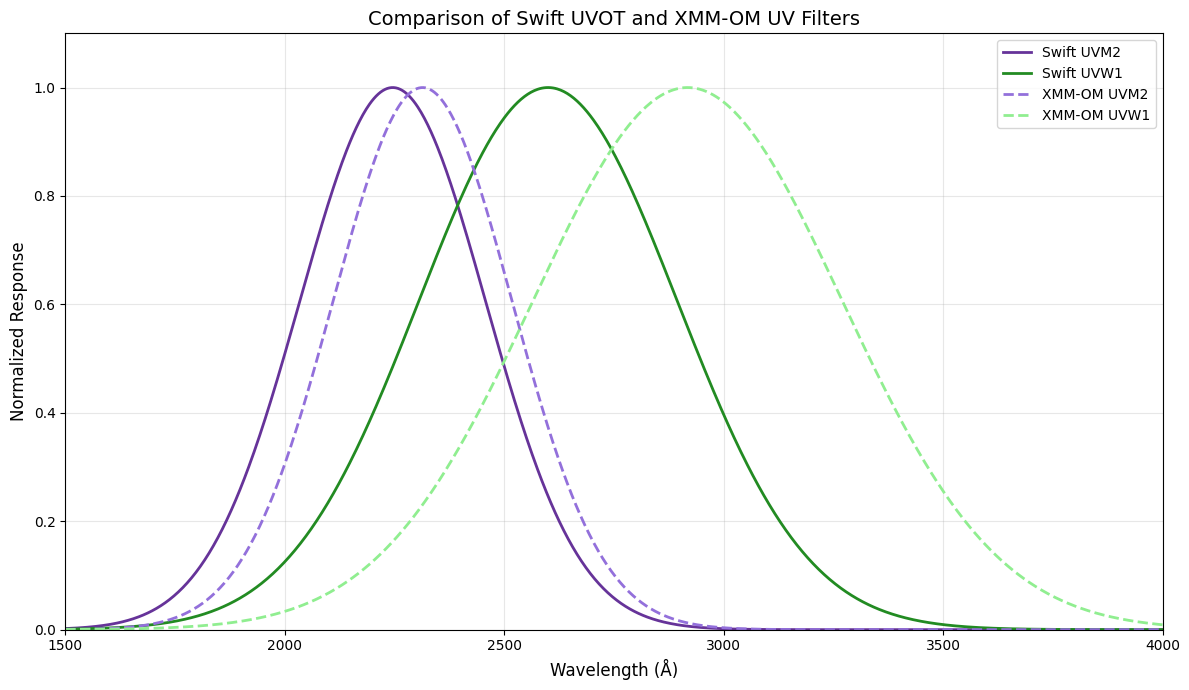

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Filter specifications
swift_filters = {
    'UVM2': {'central': 2246, 'fwhm': 498},
    'UVW1': {'central': 2600, 'fwhm': 693}
}

om_filters = {
    'UVM2': {'central': 231.4*10, 'fwhm': 48*10},  # Converting nm to Å
    'UVW1': {'central': 291.8*10, 'fwhm': 83*10}
}

# Create wavelength array
wavelength = np.linspace(1500, 4000, 1000)

# Create figure
plt.figure(figsize=(12, 7))

# Colors
purple_colors = ['#663399', '#9370DB']  # Darker and lighter purple for UVM2
green_colors = ['#228B22', '#90EE90']   # Darker and lighter green for UVW1

# Plot Swift UVOT filters
for i, (name, specs) in enumerate(swift_filters.items()):
    sigma = specs['fwhm'] / 2.355
    response = np.exp(-0.5 * ((wavelength - specs['central']) / sigma)**2)
    color = purple_colors[0] if name == 'UVM2' else green_colors[0]
    plt.plot(wavelength, response, label=f'Swift {name}', color=color, linewidth=2)

# Plot XMM-OM filters
for i, (name, specs) in enumerate(om_filters.items()):
    sigma = specs['fwhm'] / 2.355
    response = np.exp(-0.5 * ((wavelength - specs['central']) / sigma)**2)
    color = purple_colors[1] if name == 'UVM2' else green_colors[1]
    plt.plot(wavelength, response, label=f'XMM-OM {name}', color=color, linestyle='--', linewidth=2)

# Customize plot
plt.xlabel('Wavelength (Å)', fontsize=12)
plt.ylabel('Normalized Response', fontsize=12)
plt.title('Comparison of Swift UVOT and XMM-OM UV Filters', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(1500, 4000)
plt.ylim(0, 1.1)

# Show plot
plt.tight_layout()
plt.show()